In [41]:
import gc
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import normalize

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV

import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999

In [42]:
train_1 = pd.read_csv('train_FD001.txt', delim_whitespace=True, header=None)
sensor_name = ['s'+ str(i) for i in range(1,22)]
train_1.columns = ['id', 'te', 'os1', 'os2', 'os3'] + sensor_name

In [43]:
train_1

,id,te,os1,os2,os3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,21.61,554.67,2388.02,9049.68,1.3,47.16,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02,9059.13,1.3,47.36,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.00,9040.80,1.3,47.24,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,21.61,553.69,2388.05,9046.46,1.3,47.29,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05,9051.70,1.3,47.03,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
def f(col):
    smooth_col = seasonal_decompose(col.values, freq=10).trend
    return smooth_col

transformed = train_1.drop(['te', 'os1', 'os2', 'os3'], axis=1).groupby('id').transform(f)
transformed['id'] = train_1['id']  # add back because transform will throw away 'id'

# overwrite smooth signals back to train Dataframe
df_1 = train_1[['id', 'te', 'os1', 'os2', 'os3']]
df_2 = transformed.groupby('id').ffill().bfill().drop('id', axis=1)
train = pd.concat([df_1, df_2], axis=1)
df_1.head()
df_2.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,518.67,642.224,1587.3145,1400.842,14.62,21.61,554.105,2388.0485,9049.731,1.3,47.256,522.133,2388.0435,8132.326,8.409115,0.03,391.8,2388.0,100.0,38.978,23.392585
1,518.67,642.224,1587.3145,1400.842,14.62,21.61,554.105,2388.0485,9049.731,1.3,47.256,522.133,2388.0435,8132.326,8.409115,0.03,391.8,2388.0,100.0,38.978,23.392585
2,518.67,642.224,1587.3145,1400.842,14.62,21.61,554.105,2388.0485,9049.731,1.3,47.256,522.133,2388.0435,8132.326,8.409115,0.03,391.8,2388.0,100.0,38.978,23.392585
3,518.67,642.224,1587.3145,1400.842,14.62,21.61,554.105,2388.0485,9049.731,1.3,47.256,522.133,2388.0435,8132.326,8.409115,0.03,391.8,2388.0,100.0,38.978,23.392585
4,518.67,642.224,1587.3145,1400.842,14.62,21.61,554.105,2388.0485,9049.731,1.3,47.256,522.133,2388.0435,8132.326,8.409115,0.03,391.8,2388.0,100.0,38.978,23.392585


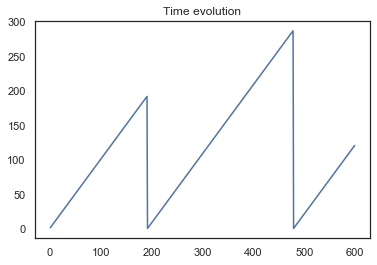

In [45]:
plt.plot(train['te'][1:600])
plt.title('Time evolution');

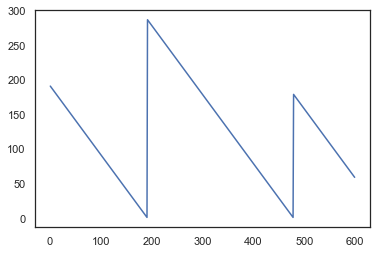

In [46]:
def f1(col):
    # Option 1: Reverse the time evolution, where remaining time of a machine is 1 at the failure.
    return col[::-1]  

train['rul'] = train[['id', 'te']].groupby('id').transform(f1)
plt.plot(train.rul[1:600]);

In [47]:
y = train['rul']
features = train.columns.drop(['id', 'te', 'rul'])


In [48]:
X = pd.DataFrame(normalize(train[features], axis=0))
X.columns = features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

Optimal value:  3.276445675909535e-06
[ 2.11804564e+01  1.41434740e+02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.80917143e+05 -2.84266336e+05 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.67549067e+05
  0.00000000e+00 -4.22587771e+05  0.00000000e+00  0.00000000e+00
 -1.06273977e+05 -1.66574068e+05  0.00000000e+00 -1.70782630e+04
 -0.00000000e+00 -0.00000000e+00  1.79642919e+05  3.38997157e+05]
Useful sensors to predict RUL:  Index(['os1', 'os2', 's3', 's4', 's9', 's11', 's14', 's15', 's17', 's20',
       's21'],
      dtype='object')


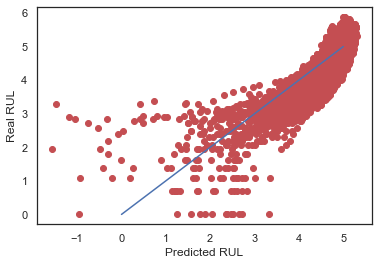

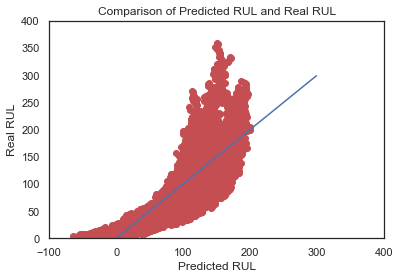

In [49]:
ls = LassoCV(random_state=12)
ls = ls.fit(X_train, y_train)

#print('List of tried parameter values: ', ls.alphas_)
print('Optimal value: ', ls.alpha_)
print(ls.coef_)
print('Useful sensors to predict RUL: ', X_train.columns[abs(ls.coef_) > 1e-6])

# compare predict RUL and real RUL
plt.figure(1)
plt.plot(np.log(ls.predict(X_test)), np.log(y_test), 'ro')
plt.xlabel('Predicted RUL')
plt.ylabel('Real RUL')
plt.plot(range(6), range(6))

# compare predict RUL and real RUL
plt.figure(2)
plt.plot(ls.predict(X_test), y_test, 'ro')
plt.xlabel('Predicted RUL')
plt.ylabel('Real RUL')
plt.title('Comparison of Predicted RUL and Real RUL')
plt.axis([-100, 400, 0, 400])
plt.plot(range(300), range(300))  # plot the line y = x of perfect prediction

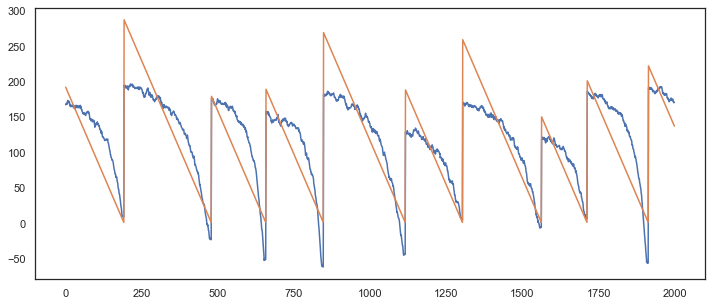

In [50]:
prediction = ls.predict(X)
plt.figure(figsize=(12,5))
plt.plot(prediction[:2000])
plt.plot(y[:2000]);

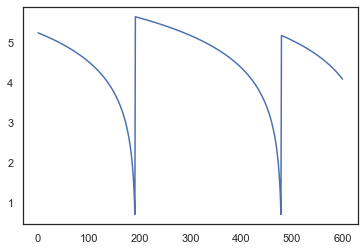

In [51]:
def f1(col):
    # Option 2: transform time evolution into exponential-degenerating remaining health index 
    return np.log(col[::-1] + 1)  

plt.figure(1)
train['rul'] = train[['id', 'te']].groupby('id').transform(f1)
plt.plot(train.rul[1:600])

y = train['rul']
features = train.columns.drop(['id', 'te', 'rul'])
X = train[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# try Lasso
from sklearn.linear_model import LassoCV

ls = LassoCV(random_state=12)
ls = ls.fit(X_train, y_train)

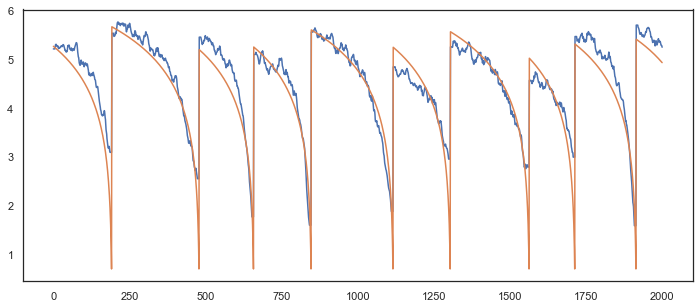

In [52]:
prediction = ls.predict(X)
plt.figure(figsize=(12,5))
plt.plot(prediction[:2000])
plt.plot(y[:2000]);